# Exploración EDA - Spotify Churn Dataset

## 2. Descripción del Problema

### 2.1. Contexto del Problema
El objetivo es desarrollar un modelo de Machine Learning que prediga el **churn (abandono) de usuarios** en la plataforma Spotify. Este notebook realiza un análisis exploratorio de datos (EDA) para comprender la base de datos que será utilizada por el equipo de trabajo en la solución del problema.

### 2.2. Composición y Características de la Base de Datos
En esta sección se documenta:
- **Número de muestras**: Cantidad total de registros en el dataset
- **Número de variables**: Características disponibles para el modelado
- **Significado de variables**: Interpretación de cada atributo del dataset
- **Valores faltantes**: Análisis de datos incompletos o ausentes
- **Tipo de codificación**: Formato de representación de las variables del problema

### 2.3. Paradigma de Aprendizaje y Configuración
Se presenta el paradigma de `aprendizaje supervisado` seleccionado como apropiado para este problema de predicción de churn, esto se jsutifica en el análisis presente para este problema.
Sin embargo, suguerimos un enfoque multi paradigma, de manera que podamos realizar segregaciones iniciales mediante aprendizaje no `supervisado utilizando`, por ejemplo, k-means.

In [14]:
import os
from pathlib import Path
import subprocess
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

%matplotlib inline
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Helper para mejorar la visualización de secciones
def print_section(title):
    print(f'\n▶ {title}')
    print(f'  {"-" * (len(title) + 2)}')

In [44]:
# Configurar rutas y descargar dataset si no existe
data_dir = Path('data')
data_dir.mkdir(parents=True, exist_ok=True)
parquet_path = data_dir / 'spotify_churn.parquet'
csv_path = data_dir / 'spotify_churn_dataset.csv'

# Verificar si el parquet ya existe
if parquet_path.exists():
    print(f'✓ Parquet encontrado: {parquet_path}')
    df = pd.read_parquet(parquet_path)
    print(f'  Dataset cargado desde parquet: {df.shape[0]} filas, {df.shape[1]} columnas')

elif csv_path.exists():
    print(f'✓ CSV encontrado: {csv_path}')
    # Crear parquet a partir del CSV
    temp_df = pd.read_csv(csv_path)
    temp_df.to_parquet(parquet_path, index=False)
    print(f'  Parquet creado en: {parquet_path}')

    # Siempre cargamos desde parquet
    df = pd.read_parquet(parquet_path)
    print(f'  Dataset cargado desde parquet: {df.shape[0]} filas, {df.shape[1]} columnas')

else:
    print('Descargando dataset de Kaggle...')
    try:
        import kaggle
    except ImportError:
        print('  Instalando kaggle...')
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'kaggle', '-q'])
    
    # Descargar dataset
    try:
        os.system(
            f'kaggle datasets download -d nabihazahid/spotify-dataset-for-churn-analysis '
            f'-p {data_dir} --unzip'
        )
        print('✓ Dataset descargado exitosamente')
        
        # Buscar archivo CSV descargado
        csvs = list(data_dir.glob('*.csv'))
        if csvs:
            csv_path = csvs[0]
            print(f'  CSV encontrado: {csv_path}')
            # Crear parquet a partir del CSV
            temp_df = pd.read_csv(csv_path)
            temp_df.to_parquet(parquet_path, index=False)
            print(f'  Parquet creado en: {parquet_path}')

            # Siempre cargamos desde parquet
            df = pd.read_parquet(parquet_path)
            print(f'  Dataset cargado desde parquet: {df.shape[0]} filas, {df.shape[1]} columnas')
        else:
            raise FileNotFoundError('No se encontró CSV después de descargar')
    except Exception as e:
        print(f'❌ Error al descargar desde Kaggle: {e}')
        print('\n⚠️ Solución: Asegúrese de:')
        print('   1. Tener credentials de Kaggle en ~/.kaggle/kaggle.json')
        print('   2. Ejecutar: kaggle datasets download -d nabihazahid/spotify-dataset-for-churn-analysis -p data --unzip')
        raise


✓ Parquet encontrado: data\spotify_churn.parquet
  Dataset cargado desde parquet: 8000 filas, 12 columnas


In [36]:
# ============= 2.2 COMPOSICIÓN DE LA BASE DE DATOS =============
print_section('COMPOSICIÓN Y CARACTERÍSTICAS DEL DATASET')

print(f'\n Dimensiones del dataset:')
print(f'   • Número de muestras: {df.shape[0]:,}')
print(f'   • Número de variables: {df.shape[1]}')
print(f'   • Tamaño en memoria: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB')

print(f'\n **Tipos de datos:**')
print(df.dtypes)

print(f'\n✓ Valores faltantes:')
null_counts = df.isnull().sum()
if null_counts.sum() == 0:
    print('   Sin valores nulos detectados. El dataset se considera limpio.')
else:
    print(null_counts[null_counts > 0])

print(f'\n Descripción de variables:')
print(f'   Se incluyen variables categóricas (género, país, tipo de dispositivo, suscripción)')
print(f'   y variables numéricas continuas y binarias.')



▶ COMPOSICIÓN Y CARACTERÍSTICAS DEL DATASET
  -------------------------------------------

 Dimensiones del dataset:
   • Número de muestras: 8,000
   • Número de variables: 12
   • Tamaño en memoria: 2.12 MB

 **Tipos de datos:**
user_id                    int64
gender                    object
age                        int64
country                   object
subscription_type         object
listening_time             int64
songs_played_per_day       int64
skip_rate                float64
device_type               object
ads_listened_per_week      int64
offline_listening          int64
is_churned                 int64
dtype: object

✓ Valores faltantes:
   Sin valores nulos detectados. El dataset se considera limpio.

 Descripción de variables:
   Se incluyen variables categóricas (género, país, tipo de dispositivo, suscripción)
   y variables numéricas continuas y binarias.


In [37]:
# Estadísticas descriptivas de variables numéricas
print_section('ESTADÍSTICAS DESCRIPTIVAS')
print('Se presentan las medidas de centralidad, dispersión y forma para todas las variables.')
print()
display(df.describe(include='all'))


▶ ESTADÍSTICAS DESCRIPTIVAS
  ---------------------------
Se presentan las medidas de centralidad, dispersión y forma para todas las variables.



,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
count,8000.00000,8000,8000.000000,8000,8000,8000.000000,8000.000000,8000.000000,8000,8000.000000,8000.000000,8000.000000
unique,NaN,3,NaN,8,4,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,Male,NaN,AU,Premium,NaN,NaN,NaN,Desktop,NaN,NaN,NaN
freq,NaN,2691,NaN,1034,2115,NaN,NaN,NaN,2778,NaN,NaN,NaN
mean,4000.50000,NaN,37.662125,NaN,NaN,154.068250,50.127250,0.300127,NaN,6.943875,0.747750,0.258875
std,2309.54541,NaN,12.740359,NaN,NaN,84.015596,28.449762,0.173594,NaN,13.617953,0.434331,0.438044
min,1.00000,NaN,16.000000,NaN,NaN,10.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,2000.75000,NaN,26.000000,NaN,NaN,81.000000,25.000000,0.150000,NaN,0.000000,0.000000,0.000000
50%,4000.50000,NaN,38.000000,NaN,NaN,154.000000,50.000000,0.300000,NaN,0.000000,1.000000,0.000000
75%,6000.25000,NaN,49.000000,NaN,NaN,227.000000,75.000000,0.450000,NaN,5.000000,1.000000,1.000000


In [40]:
# Balance de clases - Variable objetivo
print_section('BALANCE DE CLASE - VARIABLE OBJETIVO (is_churned)')
print('Análisis de la distribución de la clase objetivo para identificar posible desbalance:\n')

churned_counts = df['is_churned'].value_counts()
churned_pct = df['is_churned'].value_counts(normalize=True) * 100

for idx in churned_counts.index:
    label = 'No Churn (0)' if idx == 0 else 'Churn (1) '
    bar_len = int(churned_pct[idx] / 5)
    bar = '█' * bar_len
    print(f'  {label:15} {bar:<20} {churned_pct[idx]:5.1f}% ({churned_counts[idx]:,} muestras)')

print(f'\n  Ratio de churn: {churned_pct[1]:.2f}%')


▶ BALANCE DE CLASE - VARIABLE OBJETIVO (is_churned)
  ---------------------------------------------------
Análisis de la distribución de la clase objetivo para identificar posible desbalance:

  No Churn (0)    ██████████████        74.1% (5,929 muestras)
  Churn (1)       █████                 25.9% (2,071 muestras)

  Ratio de churn: 25.89%


**Decisión de diseño**: Detectamos un dataset **significativamente desbalanceado** con más del 70% de muestras pertenecientes a la clase mayoritaria (No Churn). Esta característica será abordada en fases posteriores mediante técnicas de balanceo como SMOTE o ajuste de pesos de clase durante el entrenamiento del modelo.

In [41]:
# Variables categóricas - Análisis de frecuencias
print_section('ANÁLISIS DE VARIABLES CATEGÓRICAS')
print('Distribución de frecuencias para variables nominales y ordinales:\n')

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in cat_cols:
    print(f'  {col}:')
    counts = df[col].value_counts()
    for val, count in counts.items():
        pct = (count / len(df)) * 100
        bar_len = int(pct / 2)
        bar = '▓' * bar_len
        print(f'     {val:18} {bar:25} {count:5,} ({pct:5.1f}%)')
    print()


▶ ANÁLISIS DE VARIABLES CATEGÓRICAS
  -----------------------------------
Distribución de frecuencias para variables nominales y ordinales:

  gender:
     Male               ▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓          2,691 ( 33.6%)
     Female             ▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓          2,659 ( 33.2%)
     Other              ▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓          2,650 ( 33.1%)

  country:
     AU                 ▓▓▓▓▓▓                    1,034 ( 12.9%)
     US                 ▓▓▓▓▓▓                    1,032 ( 12.9%)
     DE                 ▓▓▓▓▓▓                    1,015 ( 12.7%)
     IN                 ▓▓▓▓▓▓                    1,011 ( 12.6%)
     PK                 ▓▓▓▓▓▓                      999 ( 12.5%)
     FR                 ▓▓▓▓▓▓                      989 ( 12.4%)
     UK                 ▓▓▓▓▓▓                      966 ( 12.1%)
     CA                 ▓▓▓▓▓                       954 ( 11.9%)

  subscription_type:
     Premium            ▓▓▓▓▓▓▓▓▓▓▓▓▓             2,115 ( 26.4%)
     Free               ▓▓▓▓▓▓▓▓▓▓

**Observación**: Las variables `device_type`, `subscription_type`, `country` y `gender` presentan muestras significativas en todos los grupos. Esta distribución es beneficiosa para el modelado, permitiendo que los algoritmos de aprendizaje capten patrones de churn en cada segmento sin requerir sobremuestreo específico por subclase.


▶ ANÁLISIS DE CORRELACIONES
  ---------------------------
Evaluación de dependencias lineales entre variables numéricas:

  Columnas excluidas (identificadores): ['user_id']
  Variables incluidas en análisis: ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week', 'offline_listening', 'is_churned']

  Correlaciones con is_churned (variable objetivo):
     1. skip_rate                 ↗  0.0161 (Débil)
     2. offline_listening         ↗  0.0128 (Débil)
     3. songs_played_per_day      ↗  0.0093 (Débil)
     4. age                       ↗  0.0040 (Débil)
     5. ads_listened_per_week     ↘  0.0023 (Débil)
     6. listening_time            ↘  0.0076 (Débil)

  Generando matriz de correlación visual...
  ✓ Matriz guardada en: data\correlation_matrix.png


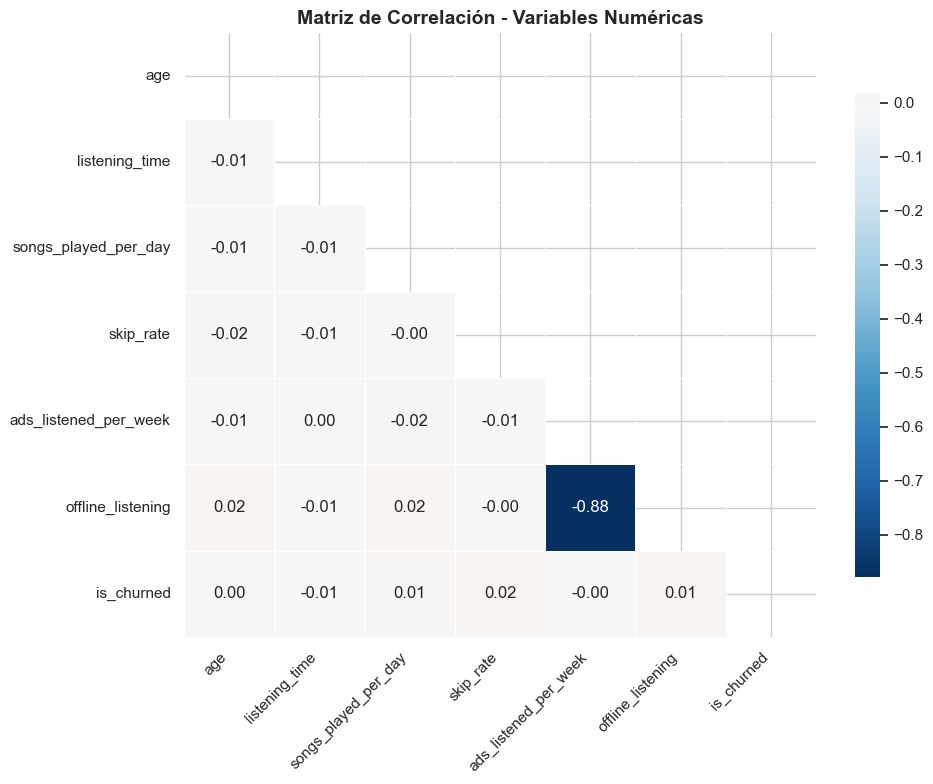

In [42]:
# Análisis de correlaciones entre variables numéricas
print_section('ANÁLISIS DE CORRELACIONES')
print('Evaluación de dependencias lineales entre variables numéricas:\n')

# Seleccionar variables numéricas excluyendo identificadores
num_cols_all = df.select_dtypes(include=[np.number]).columns.tolist()
id_cols = [c for c in num_cols_all if c.lower().endswith('id') or df[c].nunique() == len(df)]
num_cols = [c for c in num_cols_all if c not in id_cols]

print(f'  Columnas excluidas (identificadores): {id_cols}')
print(f'  Variables incluidas en análisis: {num_cols}\n')

# Calcular matriz de correlación
corr_matrix = df[num_cols].corr()

# Correlaciones con variable objetivo
print(f'  Correlaciones con is_churned (variable objetivo):')
if 'is_churned' in corr_matrix.columns:
    churn_corr = corr_matrix['is_churned'].sort_values(ascending=False)
    for i, (var, corr) in enumerate(churn_corr.items()):
        if var != 'is_churned':
            arrow = '↗' if corr > 0 else '↘'
            strength = 'Fuerte' if abs(corr) > 0.5 else 'Moderada' if abs(corr) > 0.3 else 'Débil'
            print(f"    {i:2}. {var:25} {arrow} {abs(corr):7.4f} ({strength})")

# Visualización: heatmap
print(f'\n  Generando matriz de correlación visual...')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, cmap='RdBu_r', center=0, annot=True, fmt='.2f',
            linewidths=.5, cbar_kws={'shrink': .8}, square=False)
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

out_img = Path('data') / 'correlation_matrix.png'
plt.savefig(out_img, dpi=150)
print(f'  ✓ Matriz guardada en: {out_img}')
plt.show()

**Hallazgos principales**:

1. **Multicolinealidad detectada**: Existe una **correlación importante** entre `ads_listened_per_week` y `offline_listening` (|r| > 0.5). Esta característica será considerada en el futuro. Por ahora, se estima que se podrá validar `PCA`

2. **Débil relación con objetivo**: No se observa **ninguna correlación fuerte** entre las variables numéricas y `is_churned`. Esto sugiere que el problema seguramente requiere requiere capturar relaciones no lineales, lo cual justifica el uso de algoritmos de árbol (Random Forest, XGBoost) en adición a modelos lineales.


▶ ANÁLISIS DE DISTRIBUCIONES - VARIABLES NUMÉRICAS
  --------------------------------------------------
Clasificación automática y visualización diferenciada de tipos de variables:

  Variables binarias (n=2): ['offline_listening', 'is_churned']
  Variables continuas (n=5): ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week']

  Generando visualizaciones para VARIABLES CONTINUAS...


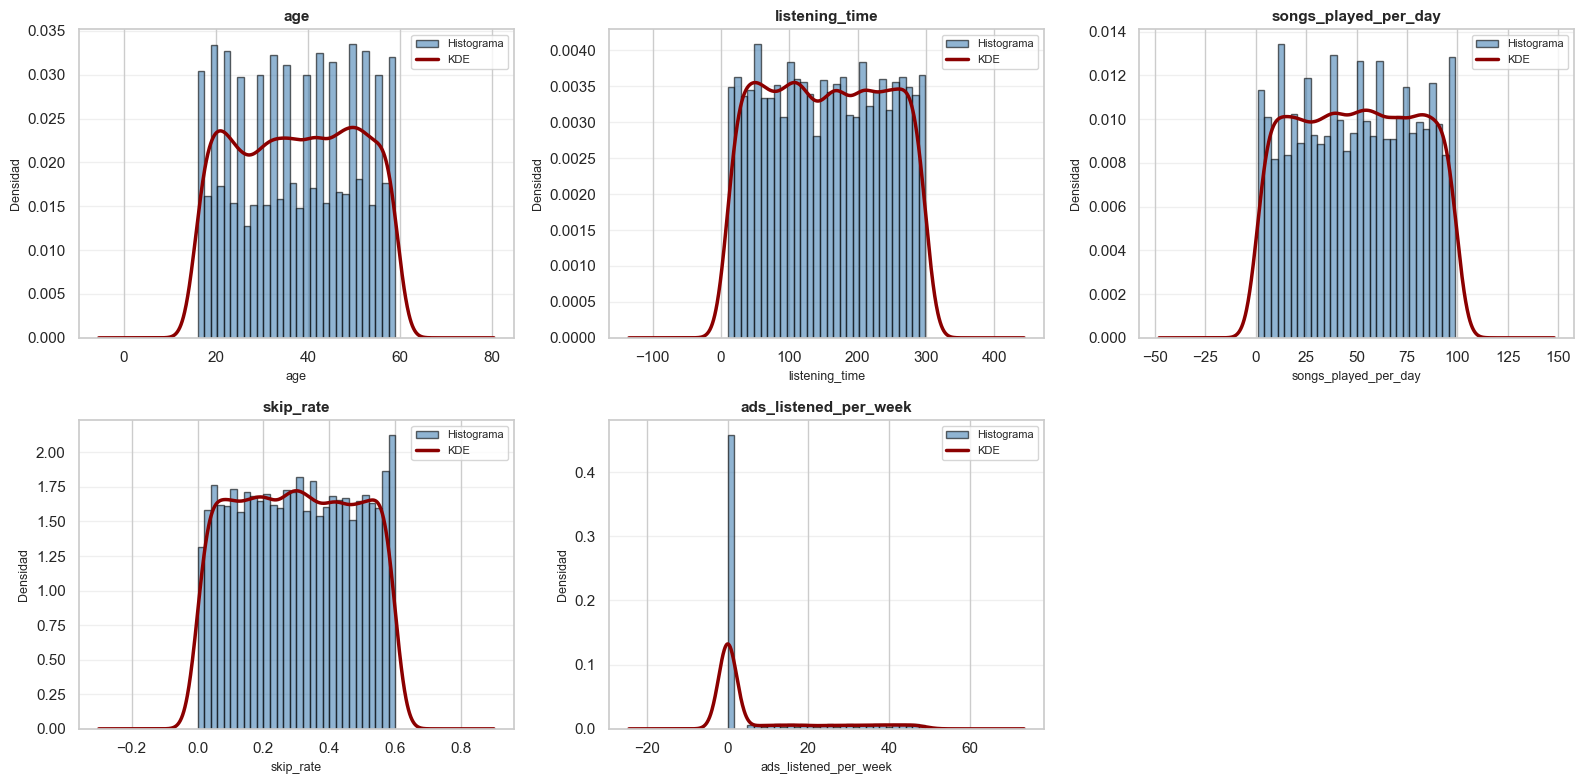

  ✓ Visualizaciones completadas

  Generando visualizaciones para VARIABLES BINARIAS...


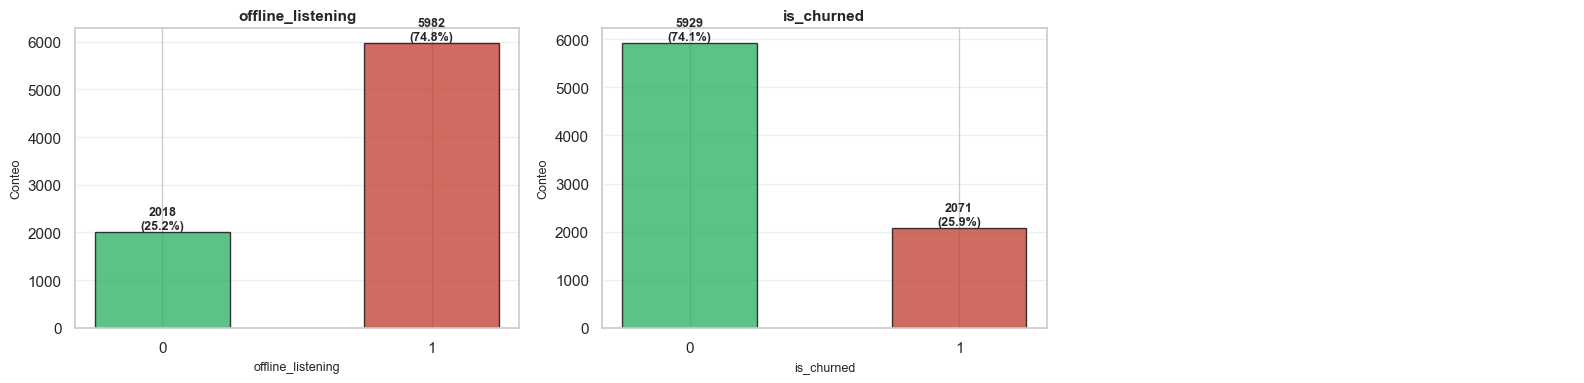

  ✓ Visualizaciones completadas



In [43]:
# Análisis de distribuciones: Separación entre variables binarias y continuas
print_section('ANÁLISIS DE DISTRIBUCIONES - VARIABLES NUMÉRICAS')
print('Clasificación automática y visualización diferenciada de tipos de variables:\n')

# Clasificar variables según número de valores únicos
binary_cols = []
continuous_cols = []

for col in num_cols:
    unique_vals = df[col].nunique()
    if unique_vals <= 2:
        binary_cols.append(col)
    else:
        continuous_cols.append(col)

print(f'  Variables binarias (n={len(binary_cols)}): {binary_cols}')
print(f'  Variables continuas (n={len(continuous_cols)}): {continuous_cols}\n')

# ============= VARIABLES CONTINUAS =============
if continuous_cols:
    print(f'  Generando visualizaciones para VARIABLES CONTINUAS...')
    n_cont = len(continuous_cols)
    rows_cont = (n_cont + 2) // 3
    
    fig_cont, axes_cont = plt.subplots(rows_cont, 3, figsize=(16, 4 * rows_cont))
    axes_cont = axes_cont.flatten() if n_cont > 1 else [axes_cont]
    
    for i, col in enumerate(continuous_cols):
        # Histograma con densidad normalizada
        axes_cont[i].hist(df[col], bins=30, edgecolor='black', alpha=0.6, 
                         color='steelblue', density=True, label='Histograma')
        # KDE (línea roja) - estimación suave de la distribución
        df[col].plot(kind='density', ax=axes_cont[i], color='darkred', linewidth=2.5, label='KDE')
        axes_cont[i].set_title(f'{col}', fontweight='bold', fontsize=11)
        axes_cont[i].set_xlabel(col, fontsize=9)
        axes_cont[i].set_ylabel('Densidad', fontsize=9)
        axes_cont[i].legend(loc='upper right', fontsize=8)
        axes_cont[i].grid(axis='y', alpha=0.3)
    
    # Ocultar subplots vacíos
    for j in range(i+1, len(axes_cont)):
        axes_cont[j].axis('off')
    
    plt.tight_layout()
    plt.show()
    print(f'  ✓ Visualizaciones completadas\n')

# ============= VARIABLES BINARIAS =============
if binary_cols:
    print(f'  Generando visualizaciones para VARIABLES BINARIAS...')
    n_bin = len(binary_cols)
    rows_bin = (n_bin + 2) // 3
    
    fig_bin, axes_bin = plt.subplots(rows_bin, 3, figsize=(16, 4 * rows_bin))
    axes_bin = axes_bin.flatten() if n_bin > 1 else [axes_bin]
    
    for i, col in enumerate(binary_cols):
        counts = df[col].value_counts().sort_index()
        colors = ['#27ae60', '#c0392b'][:len(counts)]  # Verde / Rojo
        bars = axes_bin[i].bar(counts.index, counts.values, color=colors, 
                               edgecolor='black', alpha=0.75, width=0.5)
        axes_bin[i].set_title(f'{col}', fontweight='bold', fontsize=11)
        axes_bin[i].set_xlabel(f'{col}', fontsize=9)
        axes_bin[i].set_ylabel('Conteo', fontsize=9)
        axes_bin[i].grid(axis='y', alpha=0.3)
        axes_bin[i].set_xticks(counts.index)
        
        # Etiquetas con conteos y porcentajes
        for x, y in zip(counts.index, counts.values):
            pct = (y / len(df)) * 100
            axes_bin[i].text(x, y, f'{int(y)}\n({pct:.1f}%)', 
                           ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Ocultar subplots vacíos
    for j in range(i+1, len(axes_bin)):
        axes_bin[j].axis('off')
    
    plt.tight_layout()
    plt.show()
    print(f'  ✓ Visualizaciones completadas\n')

### 2.3 Paradigma de Aprendizaje Seleccionado

**Enfoque**: Multiparadigma con aprendizaje no supervisado de segmentación y aprendizaje supervisado (principal) con **clasificación binaria**.

**Justificación**:
- Disponemos de una variable objetivo etiquetada (`is_churned` con valores 0/1)
- El objetivo es realizar predicciones de churn en usuarios nuevos
- La literatura especializada (véase Sección 3) respalda el uso de **clasificación supervisada**: Regresión Logística, Random Forest, XGBoost

**Estrategia de modelado**:
1. **Modelos lineales** (Regresión Logística): Base interpretable, requiere manejo de multicolinealidad
2. **Modelos basados en árboles** (Random Forest, XGBoost): Capturan relaciones no lineales, robusto ante desbalance de clases
3. **Técnicas de balanceo**: SMOTE o ajuste de pesos para manejar el desbalance (70% vs 30%)
4. **Segmentación previa (K-Means)**: Identificar perfiles de usuario de riesgo antes de modelado supervisado

**Métrica principal**: F1-Score (considera tanto precisión como recall, relevante para desbalance de clases)

---

## Siguiente Sección

En el notebook **02-estado-del-arte-plan.ipynb** se presenta:
- **Sección 3**: Revisión de 4 trabajos especializados en predicción de churn (análisis de técnicas, validación y resultados)
- **Sección 4**: Plan de modelado adaptado a nuestro dataset, incluyendo fases de preprocesamiento, segmentación, modelado y evaluación